In [5]:
import time
import matplotlib.pyplot as plt
import matrix_rs
import random
import numpy as np

def generate_matrix(n, m):
    return [[random.random() for _ in range(m)] for _ in range(n)]

def to_numpy(matrix):
    return np.array(matrix)

def compare_benchmarks(sizes):
    rust_times = []
    python_times = []
    numpy_times = []

    for size in sizes:
        A = generate_matrix(size, size)
        B = generate_matrix(size, size)

        # Rust
        start = time.time()
        _ = matrix_rs.mul(A, B)
        rust_time = time.time() - start

        # Python
        start = time.time()
        _ = python_mul(A, B)
        python_time = time.time() - start

        # NumPy
        A_np = to_numpy(A)
        B_np = to_numpy(B)
        start = time.time()
        _ = np.matmul(A_np, B_np)
        numpy_time = time.time() - start

        print(f"{size}x{size} → Rust: {rust_time:.6f}s | Python: {python_time:.6f}s | NumPy: {numpy_time:.6f}s")

        rust_times.append(rust_time)
        python_times.append(python_time)
        numpy_times.append(numpy_time)

    return rust_times, python_times, numpy_times

def python_mul(A, B):
    n = len(A)
    m = len(B[0])
    p = len(B)
    
    result = [[0.0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for k in range(p):
                result[i][j] += A[i][k] * B[k][j]
    
    return result


8x8 → Rust: 0.000161s | Python: 0.000055s | NumPy: 0.000020s
16x16 → Rust: 0.000718s | Python: 0.000316s | NumPy: 0.000015s
32x32 → Rust: 0.006880s | Python: 0.003451s | NumPy: 0.000101s
64x64 → Rust: 0.043463s | Python: 0.022319s | NumPy: 0.000075s
128x128 → Rust: 0.300226s | Python: 0.261909s | NumPy: 0.000564s
256x256 → Rust: 2.513843s | Python: 1.667204s | NumPy: 0.001185s
512x512 → Rust: 19.266147s | Python: 17.085810s | NumPy: 0.006239s


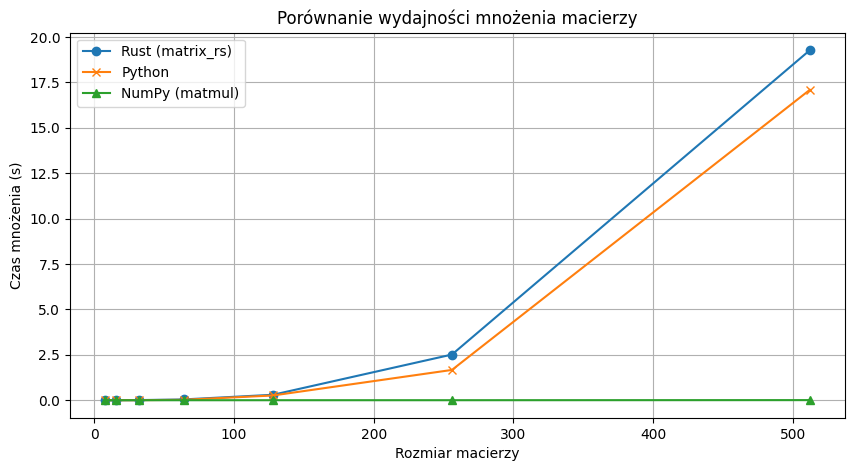

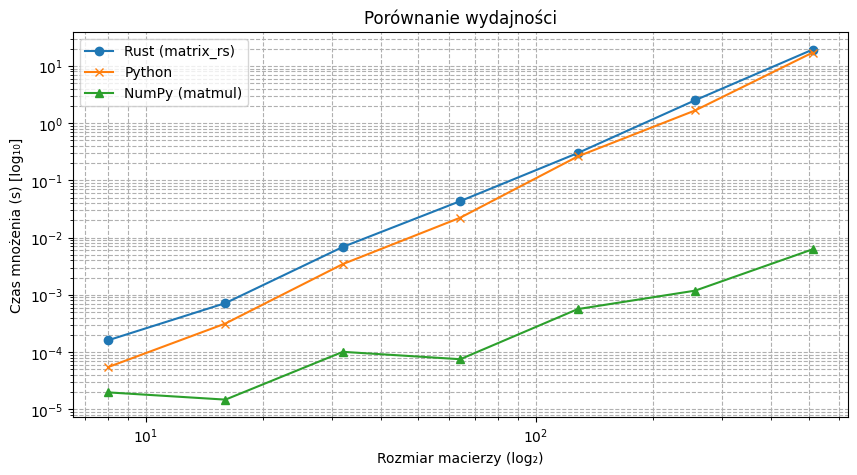

In [6]:
sizes = [8, 16, 32, 64, 128, 256, 512]

rust, python, numpy_ = compare_benchmarks(sizes)

plt.figure(figsize=(10, 5))
plt.plot(sizes, rust, label='Rust (matrix_rs)', marker='o')
plt.plot(sizes, python, label='Python', marker='x')
plt.plot(sizes, numpy_, label='NumPy (matmul)', marker='^')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas mnożenia (s)")
plt.title("Porównanie wydajności mnożenia macierzy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.loglog(sizes, rust, label='Rust (matrix_rs)', marker='o')
plt.loglog(sizes, python, label='Python', marker='x')
plt.loglog(sizes, numpy_, label='NumPy (matmul)', marker='^')
plt.xlabel("Rozmiar macierzy (log₂)")
plt.ylabel("Czas mnożenia (s) [log₁₀]")
plt.title("Porównanie wydajności")
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()


### Interpretacja wykresów

NumPy jest zdecydowanie najszybszy w mnożeniu macierzy, poprzez wykorzystanie wysoko zoptymalizowanych bibliotek niskopoziomowych. Implementacje w Rust i Pythonie mają podobną złożoność czasową, co dobrze widać na wykresie log-log jako prostą linię.
